In [1]:
'''
Anlaysis:
Trend 1: As the number of rides per driver increase from Rural > Suburban > Urban.

Trend 2: The number of drivers per city increases as from Rural > Suburban > Urban.

Trend 3: Tha average fare price decreases from Rural > Suburban > Urban.

'''

'\nAnlaysis:\nTrend 1: As the number of rides per driver increase from Rural > Suburban > Urban.\n\nTrend 2: The number of drivers per city increases as from Rural > Suburban > Urban.\n\nTrend 3: Tha average fare price decreases from Rural > Suburban > Urban.\n\n'

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


In [3]:
city_data = pd.read_csv('raw_data/city_data.csv')
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
ride_data = pd.read_csv('raw_data/ride_data.csv')
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
city_info_df= pd.merge(city_data, ride_data, on='city')
city_info_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [7]:
city_info_df = pd.DataFrame(city_info_df)
city_info_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [8]:
total_fares = city_info_df['fare'].sum()
total_fares

64669.11999999995

In [9]:
total_rides = city_info_df['ride_id'].count()
total_rides

2407

In [10]:
total_drivers = city_data_df['driver_count'].sum()
total_drivers

3349

In [11]:
'''Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
Average Fare ($) Per City
Total Number of Rides Per City
Total Number of Drivers Per City
City Type (Urban, Suburban, Rural)'''

'Your objective is to build a Bubble Plot that showcases the relationship between four key variables:\nAverage Fare ($) Per City\nTotal Number of Rides Per City\nTotal Number of Drivers Per City\nCity Type (Urban, Suburban, Rural)'

In [12]:
city_groups = city_info_df.groupby('city')

In [13]:
# isolated via Urban type city 
urban_fpc = city_info_df.loc[city_info_df['type']=='Urban']
urban_fpc_df = pd.DataFrame(urban_fpc)
urban_city_groups = urban_fpc_df.groupby('city')

In [14]:
# Urban city total
urban_ucc = len(urban_city_groups["city"].unique())
urban_ct = urban_ucc
urban_ct

66

In [15]:
# Urban city fare totals
ucg_total = urban_city_groups['fare'].sum()
ucg_total_df = pd.DataFrame(ucg_total)
ucg_total_df.head()

,fare
city,
Alvarezhaven,741.79
Alyssaberg,535.85
Antoniomouth,519.75
Aprilchester,417.65
Arnoldview,778.30


In [16]:
# Reformatting the Urban city fare totals
ucg_total_df = ucg_total_df.rename(columns={"fare": "Urban Total Fare"})
ucg_total_df = ucg_total_df.reset_index()
ucg_total_df.head()

,city,Urban Total Fare
0,Alvarezhaven,741.79
1,Alyssaberg,535.85
2,Antoniomouth,519.75
3,Aprilchester,417.65
4,Arnoldview,778.30


In [17]:
# avg fare per urban city
urban_acf = ucg_total / urban_ct
urban_acf_df = pd.DataFrame(urban_acf)
urban_acf_df.head()

,fare
city,
Alvarezhaven,11.239242
Alyssaberg,8.118939
Antoniomouth,7.875000
Aprilchester,6.328030
Arnoldview,11.792424


In [18]:
# Reformatting the avg fare per Urban city
urban_acf_df = urban_acf_df.rename(columns={"fare": "Average Urban Fare"})
urban_acf_df = urban_acf_df.reset_index()
urban_acf_df.head()

,city,Average Urban Fare
0,Alvarezhaven,11.239242
1,Alyssaberg,8.118939
2,Antoniomouth,7.875000
3,Aprilchester,6.328030
4,Arnoldview,11.792424


In [19]:
# total number of rides per Urban city
urban_trc = urban_city_groups['ride_id'].count()
urban_trc_df = pd.DataFrame(urban_trc)
urban_trc.dtype

dtype('int64')

In [20]:
# Reformatting the total number of rides per Urban city
urban_trc_df = urban_trc_df.rename(columns={"ride_id": "Urban Ride Total"})
urban_trc_df = urban_trc_df.reset_index()
urban_trc_df.head()

,city,Urban Ride Total
0,Alvarezhaven,31
1,Alyssaberg,26
2,Antoniomouth,22
3,Aprilchester,19
4,Arnoldview,31


In [21]:
# Urban city Driver total
udt = urban_city_groups['driver_count'].unique()
udt = udt.astype(int)
udt.head()

city
Alvarezhaven    21
Alyssaberg      67
Antoniomouth    21
Aprilchester    49
Arnoldview      41
Name: driver_count, dtype: int64

In [22]:
# Merged Urban DataFrames
urban_merge = ucg_total_df.merge(urban_acf_df, on='city')
urban_summary = urban_merge.merge(urban_trc_df, on='city')
urban_summary.head()

,city,Urban Total Fare,Average Urban Fare,Urban Ride Total
0,Alvarezhaven,741.79,11.239242,31
1,Alyssaberg,535.85,8.118939,26
2,Antoniomouth,519.75,7.875000,22
3,Aprilchester,417.65,6.328030,19
4,Arnoldview,778.30,11.792424,31


In [23]:
# Isolated info for Suburban type city
suburban_fpc = city_info_df.loc[city_info_df['type']=='Suburban']
suburban_fpc_df = pd.DataFrame(suburban_fpc)
suburban_city_groups = suburban_fpc_df.groupby('city')

In [24]:
# Suburban city total
suburban_ucc = len(suburban_city_groups["city"].unique())
suburban_ct = suburban_ucc
suburban_ct

41

In [25]:
# Suburban Total Fares
sucg_total = suburban_city_groups['fare'].sum()
sucg_total_df = pd.DataFrame(sucg_total)
sucg_total_df.head()

,fare
city,
Anitamouth,335.84
Campbellport,505.67
Carrollbury,366.06
Clarkstad,372.62
Conwaymouth,380.51


In [26]:
# Reformatting the Suburban Total Fares
sucg_total_df = sucg_total_df.rename(columns={"fare": "Suburban Total Fare"})
sucg_total_df = sucg_total_df.reset_index()
sucg_total_df.head()

,city,Suburban Total Fare
0,Anitamouth,335.84
1,Campbellport,505.67
2,Carrollbury,366.06
3,Clarkstad,372.62
4,Conwaymouth,380.51


In [27]:
# Suburban avg city fare
suburban_acf = sucg_total / suburban_ct
suburban_acf_df = pd.DataFrame(suburban_acf)
suburban_acf_df.head()

,fare
city,
Anitamouth,8.191220
Campbellport,12.333415
Carrollbury,8.928293
Clarkstad,9.088293
Conwaymouth,9.280732


In [28]:
# Reformatting Suburban avg city fare
suburban_acf_df = suburban_acf_df.rename(columns={"fare": "Average Suburban Fare"})
suburban_acf_df = suburban_acf_df.reset_index()
suburban_acf_df.head()

,city,Average Suburban Fare
0,Anitamouth,8.191220
1,Campbellport,12.333415
2,Carrollbury,8.928293
3,Clarkstad,9.088293
4,Conwaymouth,9.280732


In [29]:
# total number of rides per Suburban city
suburban_trc = suburban_city_groups['ride_id'].count()
suburban_trc_df = pd.DataFrame(suburban_trc)
suburban_trc.head()

city
Anitamouth       9
Campbellport    15
Carrollbury     10
Clarkstad       12
Conwaymouth     11
Name: ride_id, dtype: int64

In [30]:
# Reformatting the total number of rides per Suburban city
suburban_trc_df = suburban_trc_df.rename(columns={"ride_id": "Suburban Ride Total"})
suburban_trc_df = suburban_trc_df.reset_index()
suburban_trc_df.head()

,city,Suburban Ride Total
0,Anitamouth,9
1,Campbellport,15
2,Carrollbury,10
3,Clarkstad,12
4,Conwaymouth,11


In [31]:
suburban_merge = sucg_total_df.merge(suburban_acf_df, on='city')
suburban_merge2 = suburban_merge.merge(suburban_trc_df, on='city')
suburban_summary = suburban_merge2.merge(city_data_df, on='city')
suburban_summary.head()

,city,Suburban Total Fare,Average Suburban Fare,Suburban Ride Total,driver_count,type
0,Anitamouth,335.84,8.191220,9,16,Suburban
1,Campbellport,505.67,12.333415,15,26,Suburban
2,Carrollbury,366.06,8.928293,10,4,Suburban
3,Clarkstad,372.62,9.088293,12,21,Suburban
4,Conwaymouth,380.51,9.280732,11,18,Suburban


In [32]:
su_dc = suburban_summary['driver_count'].unique()
su_dc = su_dc.astype(int)
su_dc

array([16, 26,  4, 21, 18,  9, 22,  7, 25,  8, 13, 12, 24,  5, 20, 14, 27,
       15,  3, 11, 10, 19,  6,  1, 17])

In [33]:
# Isolated info by Rural type city
rural_fpc = city_info_df.loc[city_info_df['type']=='Rural']
rural_fpc_df = pd.DataFrame(rural_fpc)
rural_city_groups = rural_fpc_df.groupby('city')

In [34]:
# Rural city total
rural_ucc = len(rural_city_groups["city"].unique())
rural_ct = rural_ucc
rural_ct

18

In [35]:
# Rural Total Fares
rural_total = rural_city_groups['fare'].sum()
rural_total_df = pd.DataFrame(rural_total)
rural_total_df.head()

,fare
city,
East Leslie,370.27
East Stephen,390.53
East Troybury,232.71
Erikport,240.35
Hernandezshire,288.02


In [36]:
# Reforamtted Rural Total Fares
rural_total_df = rural_total_df.rename(columns={"fare": "Rural Total Fare"})
rural_total_df = rural_total_df.reset_index()
rural_total_df.head()

,city,Rural Total Fare
0,East Leslie,370.27
1,East Stephen,390.53
2,East Troybury,232.71
3,Erikport,240.35
4,Hernandezshire,288.02


In [37]:
# Suburban avg city fare
rural_acf = rural_total / rural_ct
rural_acf_df = pd.DataFrame(rural_acf)
rural_acf_df.head()

,fare
city,
East Leslie,20.570556
East Stephen,21.696111
East Troybury,12.928333
Erikport,13.352778
Hernandezshire,16.001111


In [38]:
rural_acf_df = rural_acf_df.rename(columns={"fare": "Average Rural Fare"})
rural_acf_df = rural_acf_df.reset_index()
rural_acf_df.head()

,city,Average Rural Fare
0,East Leslie,20.570556
1,East Stephen,21.696111
2,East Troybury,12.928333
3,Erikport,13.352778
4,Hernandezshire,16.001111


In [39]:
# total number of rides per Rural city
rural_trc = rural_city_groups['ride_id'].count()
rural_trc_df = pd.DataFrame(rural_trc)
rural_trc_df.head()

,ride_id
city,
East Leslie,11
East Stephen,10
East Troybury,7
Erikport,8
Hernandezshire,9


In [40]:
# Reformatted total number of rides per Rural city
rural_trc_df = rural_trc_df.rename(columns={"ride_id": "Suburban Ride Total"})
rural_trc_df = rural_trc_df.reset_index()
rural_trc_df.head()

,city,Suburban Ride Total
0,East Leslie,11
1,East Stephen,10
2,East Troybury,7
3,Erikport,8
4,Hernandezshire,9


In [41]:
# Rural Driver Total
rdt = rural_city_groups['driver_count'].unique()
rdt = rdt.astype(int)
rdt.head()

city
East Leslie        9
East Stephen       6
East Troybury      3
Erikport           3
Hernandezshire    10
Name: driver_count, dtype: int64

In [42]:
rural_merge = rural_total_df.merge(rural_acf_df, on='city')
rural_summary = rural_merge.merge(rural_trc_df, on='city')
rural_summary.head()

,city,Rural Total Fare,Average Rural Fare,Suburban Ride Total
0,East Leslie,370.27,20.570556,11
1,East Stephen,390.53,21.696111,10
2,East Troybury,232.71,12.928333,7
3,Erikport,240.35,13.352778,8
4,Hernandezshire,288.02,16.001111,9


In [43]:

urban = plt.scatter(urban_trc, urban_acf, marker="o", facecolor="lightcoral", edgecolors="black", label = "Urban", s = udt, alpha = 0.75)



In [44]:
suburban = plt.scatter(suburban_trc, suburban_acf, marker="o", facecolor="skyblue", edgecolors="black", label = "Suburban", s=su_dc, alpha=0.75)



In [45]:
rural = plt.scatter(rural_trc, rural_acf, marker="o", facecolor="gold", edgecolors="black", label = "Rural", s=rdt, alpha=0.75)


In [46]:
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


In [47]:
plt.ylim(0, 30)

(0, 30)

In [48]:
plt.xlim(0, 35)

(0, 35)

In [49]:
#legend
plt.legend(handles = [urban, suburban, rural], loc = 'best')

In [50]:
plt.grid()

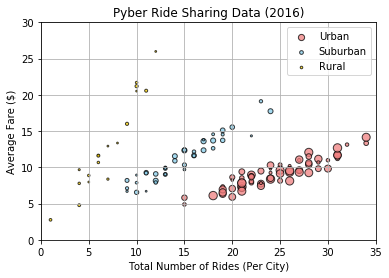

In [51]:
plt.savefig("pyber_ride_sharing_data.png")
plt.show()

In [52]:
# % of Total Fares by Urban City Type
urb_tot_fare = ucg_total.sum()
urban_percent_tot_fare = (urb_tot_fare / total_fares) * 100
urban_percent_tot_fare

61.97446323685868

In [53]:
# % of Total Fares by Suburban City Type
sub_tot_fare = sucg_total.sum()
sub_percent_tot_fare = (sub_tot_fare / total_fares) * 100
sub_percent_tot_fare

31.445750305555443

In [54]:
# % of Total Fares by Rural City Type
rur_tot_fare = rural_total.sum()
rur_percent_tot_fare = (rur_tot_fare / total_fares) * 100
rur_percent_tot_fare

6.579786457585944

In [55]:
# Labels for the sections of our pie chart, 
labels = ["Total Urban Fares", "Total Suburban Fares", "Total Rural Fares"]

# The values of each section of the pie chart
sizes = [urban_percent_tot_fare, sub_percent_tot_fare, rur_percent_tot_fare]

# The colors of each section of the pie chart
colors = ["lightcoral","lightskyblue","gold"]

# Tells matplotlib to seperate section from the others
explode = (0.1, 0, 0.0)

In [56]:
# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x10fadb748>,
  <matplotlib.text.Text at 0x112eaec88>])

In [57]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.2108148442451359,
 1.1195081872813206,
 -1.1505576098209547,
 1.1024075187583688)

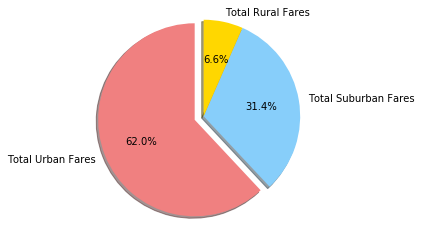

In [58]:
# Prints our pie chart to the screen
plt.savefig("total_fares_by_city_type_data.png")
plt.show()

In [59]:
# % of Total Rides by Urban City Type
urb_tot_rides = urban_trc.sum()
urban_percent_tot_rides = (urb_tot_rides / total_rides)*100
urban_percent_tot_rides


67.511425010386375

In [60]:
# % of Total Rides by Suburban City Type
sub_tot_rides = suburban_trc.sum()
sub_percent_tot_rides = (sub_tot_rides / total_rides)*100
sub_percent_tot_rides

27.295388450353137

In [61]:
# % of Total Rides by Rural City Type
rur_tot_rides = rural_trc.sum()
rur_percent_tot_rides = (rur_tot_rides / total_rides)*100
rur_percent_tot_rides

5.1931865392604903

In [62]:
# Labels for the sections of our pie chart, 
labels = ["Urban Total Rides", "Suburban Total Rides", "Rural Total Rides"]

# The values of each section of the pie chart
sizes = [urban_percent_tot_rides, sub_percent_tot_rides, rur_percent_tot_rides ]

# The colors of each section of the pie chart
colors = ["lightcoral","lightskyblue","gold"]

# Tells matplotlib to seperate section from the others
explode = (0.1, 0, 0.0)

In [63]:
# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x112f8ee80>,
  <matplotlib.text.Text at 0x112fb6400>])

In [64]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.1932705425802141,
 1.1098032420872641,
 -1.1614913716774034,
 1.1029281765673717)

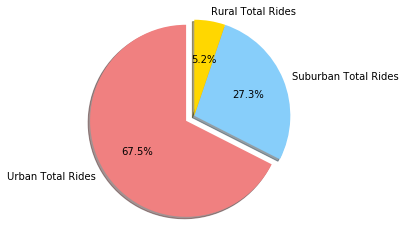

In [65]:
# Prints our pie chart to the screen
plt.savefig("total_rides_per_city_type.png")
plt.show()

In [66]:
# % of Total Drivers by Urban City Type
urb_tot_drivers = udt.sum()
urb_percent_tot_drivers = (urb_tot_drivers / total_drivers)*100
urb_percent_tot_drivers

77.84413257688863

In [67]:
# % of Total Drivers by Suburban City Type
srb_tot_drivers = su_dc.sum()
srb_percent_tot_drivers = (srb_tot_drivers / total_drivers)*100
srb_percent_tot_drivers


10.540459838757839

In [68]:
# % of Total Drivers by Rural City Type
rur_tot_drivers = rdt.sum()
rur_percent_tot_drivers = (rur_tot_drivers / total_drivers)*100
rur_percent_tot_drivers

3.1054045983875787

In [69]:
# Labels for the sections of our pie chart, 
labels = ["Urban Drivers", "Suburban Drivers", "Rural Drivers"]

# The values of each section of the pie chart
sizes = [urb_percent_tot_drivers, srb_percent_tot_drivers, rur_percent_tot_drivers]

# The colors of each section of the pie chart
colors = ["lightcoral","lightskyblue","gold"]

# Tells matplotlib to seperate section from the others
explode = (0.1, 0, 0.0)


In [70]:
# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x113087c18>,
  <matplotlib.text.Text at 0x1130b0198>])

In [71]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.1517790925545255,
 1.058572794442451,
 -1.1999187466243408,
 1.1047580355535356)

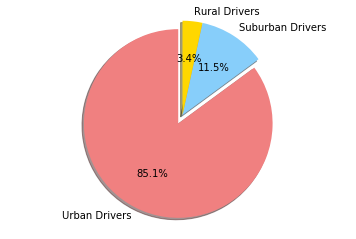

In [72]:
# Prints our pie chart to the screen
plt.savefig("total_num_of_drivers_per_city_type.png")
plt.show()